In [325]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time 
### Global variables
k = 0.835

In [69]:
################## General Functions ########################
#############################################################
### Problem Set Up
def get_N_t_N_x(t_end,x_end,dt,dx):

    N_t = int(t_end//dt +1)
    N_x = int(x_end//dx +1) 

    return N_t,N_x

def initialise_grid(N_t,N_x,Tt_0,Tx_0,Tx_L):

    grid = np.zeros((N_t,N_x))

    #initial values 
    grid[0,:] = Tt_0
    #boundary values 
    grid[:,0] = Tx_0
    grid[:,N_x-1] = Tx_L

    return grid

### Analytical Solution for part 1 and 2
def get_ana_T(x,x_end,t,N=100):

    temperature = 0
    for i in np.arange(1,N,2):

        sin_term = np.sin((i*np.pi*x)/x_end)
        exp_term = np.exp(-((i**2)*(np.pi**2)*k*t/(x_end**2)))

        temperature += (1/i)*sin_term*exp_term

    temperature = (2000/np.pi)*temperature
    return temperature

def get_ana_T_vals_fixed_x(t_vals,x_vals,x_int):

    temp_vals = np.empty((len(t_vals)))
    for i,t in enumerate(t_vals):
        temp_vals[i] = get_ana_T(x_vals[x_int],x_vals[-1],t)
    return temp_vals

### Plotting
def plot_TxTL_exp(T_grid,t_vals,x_vals):

    fig,ax = plt.subplots(figsize =(8,8))
    for i,temps in enumerate(T_grid):
        plt.plot(x_vals,temps,label="t={}s".format(t_vals[i]))
    plt.xlabel('X Position (cm)')
    plt.ylabel('Temperature (C$\degree$)')
    plt.legend(fontsize=8.7)
    plt.show()

def plot_Tt_exp(ana_T_vals,T_grid,x_int,t_vals,x_vals):

    T_grid_x_int = T_grid[:,x_int]
    fig,ax = plt.subplots(figsize =(8,8))
    plt.plot(t_vals,T_grid_x_int,label='Explicit Numerical Solution')
    plt.plot(t_vals,ana_T_vals,label='Analytical Solution')
    plt.plot(t_vals,abs(T_grid_x_int-ana_T_vals),label='Absolute Numerical Error')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (X = {} cm) (C$\degree$)'.format(x_vals[x_int]))
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5,0.5,0.0))
    plt.show()


In [70]:
################## Explicit Solver Functions #######################
####################################################################
def explicit_update(dx,dt,T_txm,T_tx,T_txp):

    T_tpx = ((k*dt)/(dx**2))*(T_txm + T_tx*(((dx**2)/(k*dt))-2)+T_txp)

    return T_tpx

def explicit_temp_iter(T_grid,N_t,N_x,dt,dx):

    for j in np.arange(0,N_t-1):
        for i in np.arange(1,N_x-1):
            #print(T_grid[j,i-1],T_grid[j,i],T_grid[j,i+1])

            T_grid[j+1,i] = explicit_update(dx,dt,T_grid[j,i-1],T_grid[j,i],T_grid[j,i+1])
    
    return T_grid

def get_exp_results(tt,xx,dt,dx,T_x0,T_xL,T_t0):
    
    t_vals = np.arange(0,tt+dt,dt)
    x_vals = np.arange(0,xx+dx,dx)
    N_t,N_x = get_N_t_N_x(tt,xx,dt,dx)

    temp_grid = initialise_grid(N_t,N_x,T_t0,T_x0,T_xL)
    exp_temp_grid = explicit_temp_iter(temp_grid,N_t,N_x,dt,dx)

    return t_vals,x_vals,exp_temp_grid

################ Explicit Solver Results ##########################
#System dimensions,IVPs and BVPs
tt = 600
xx = 100
T_x0 = 0
T_xL = 0
T_t0 = 500

#initial step sizes 1
#dt = 100
#dx = 20

t_vals_1,x_vals_1,exp_grid_1 = get_exp_results(600,100,100,20,0,0,500)
T_x_fixed_1_exp = exp_grid_1[:,1]

analytical_vals_1 = get_ana_T_vals_fixed_x(t_vals_1,x_vals_1,1)
error_vals_1_exp = abs(T_x_fixed_1_exp-analytical_vals_1)

t_analytical_plot = np.arange(0,tt+1,1)
analytical_plot = get_ana_T_vals_fixed_x(t_analytical_plot,x_vals_1,1)

############################ step sizes 2 #####################
#dt = 50
#dx = 20

t_vals_2,x_vals_2,exp_grid_2 = get_exp_results(600,100,50,20,0,0,500)
T_x_fixed_2_exp = exp_grid_2[:,1]
analytical_vals_2 = get_ana_T_vals_fixed_x(t_vals_2,x_vals_2,1)
error_vals_2_exp = abs(T_x_fixed_2_exp-analytical_vals_2)

########################## step sizes 3 ######################
#dt = 100
#dx = 10

t_vals_3,x_vals_3,exp_grid_3 = get_exp_results(600,100,100,10,0,0,500)
T_x_fixed_3_exp = exp_grid_3[:,2]
analytical_vals_3 = get_ana_T_vals_fixed_x(t_vals_3,x_vals_3,2)
error_vals_3_exp = abs(T_x_fixed_3_exp-analytical_vals_3)

In [307]:
T_data_exp = np.array([[100,20,T_x_fixed_1_exp[-1],error_vals_1_exp[-1]],
                 [50,20,T_x_fixed_2_exp[-1],error_vals_2_exp[-1]],
                 [100,10,T_x_fixed_3_exp[-1],error_vals_3_exp[-1]]])

T_data_exp = np.reshape(T_data_exp,(3,4))
df_T_data_exp = pd.DataFrame(T_data_exp, columns=['$dt$', '$dx$', '$T(x=20,t=600)$','Absolute Error'])
df_T_data_exp
print(df_T_data_exp.to_latex(index=False))


\begin{tabular}{rrrr}
\toprule
 \$dt\$ &  \$dx\$ &  \$T(x=20,t=600)\$ &  Absolute Error \\
\midrule
100.0 &  20.0 &       220.962066 &        9.614814 \\
 50.0 &  20.0 &       225.046963 &        5.529917 \\
100.0 &  10.0 &     -1995.656788 &     2226.233668 \\
\bottomrule
\end{tabular}



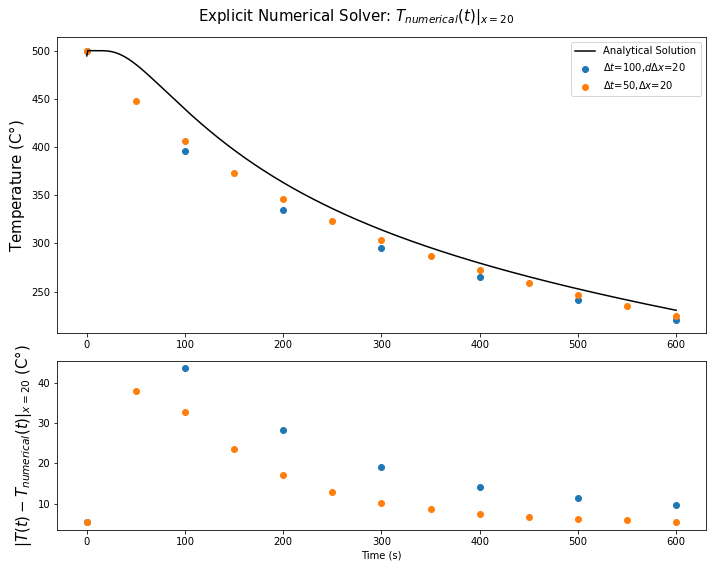

In [317]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,8),gridspec_kw={'height_ratios': [3.5, 2]})
fig.suptitle("Explicit Numerical Solver: $T_{numerical}(t)|_{x=20}$",fontsize=15)
ax1.plot(t_analytical_plot,analytical_plot,label=("Analytical Solution"),c='k')
ax1.scatter(t_vals_1,T_x_fixed_1_exp,label=("$\Delta t$=100,$d\Delta x$=20"))
ax1.scatter(t_vals_2,T_x_fixed_2_exp,label=("$\Delta t$=50,$\Delta x$=20"))
#ax1.scatter(t_vals_3,T_x_fixed_3_exp,label=("$dt$=100,$dx$=10"))
ax1.set_ylabel("Temperature (C$\degree$)",fontsize=15)
ax1.legend()
ax2.scatter(t_vals_1,error_vals_1_exp,label=("$\Delta t$=100,$\Delta x$=20"))
ax2.scatter(t_vals_2,error_vals_2_exp,label=("$\Delta t$=50,$\Delta x$=20"))
#ax2.scatter(t_vals_3,error_vals_3_exp,label=("$dt$=100,$dx$=10"))
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("$|T(t) - T_{numerical}(t)|_{x=20}$ (C$\degree$)",fontsize=15)
fig.tight_layout()
plt.show()

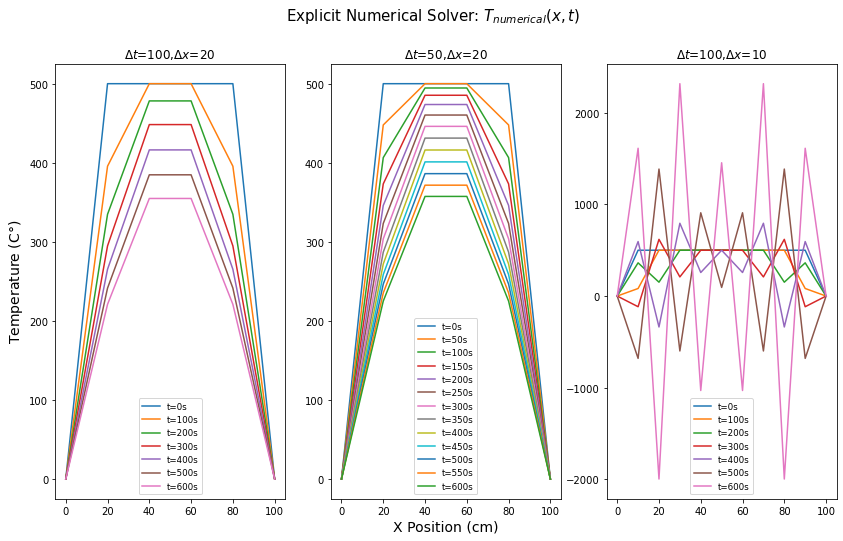

In [319]:
fig,axes = plt.subplots(1,3,figsize=(14,8))
fig.suptitle("Explicit Numerical Solver: $T_{numerical}(x,t)$",fontsize=15)
T_grids_exp = np.array([exp_grid_1,exp_grid_2,exp_grid_3],dtype=object)
t_vals = np.array([t_vals_1,t_vals_2,t_vals_3],dtype=object)
x_vals = np.array([x_vals_1,x_vals_2,x_vals_3],dtype=object)
titles = np.array(["$\Delta t$=100,$\Delta x$=20","$\Delta t$=50,$\Delta x$=20","$\Delta t$=100,$\Delta x$=10"])
for i,ax in enumerate(axes.flat):
    if i ==0:
        ax.set_ylabel('Temperature (C$\degree$)',fontsize = 14)
    elif i ==1: 
        ax.set_xlabel('X Position (cm)',fontsize=14)
    temp_grid = T_grids_exp[i]
    for j,temps in enumerate(temp_grid):
        ax.plot(x_vals[i],temps,label="t={}s".format(t_vals[i][j]))
    ax.set_title(titles[i])
    ax.legend(loc='lower center',fontsize=8.7)
plt.show()


In [320]:
################## Implicit Solver - Crank Nicolson ###################
#######################################################################
def init_cn_matrix(N_x,dt,dx):

    cn_matrix = np.zeros((N_x-2,N_x-2))
    gamma = (k*dt)/(2*(dx)**2)
    
    for i in np.arange(N_x-2):

        cn_matrix[i,i] = (1+2*gamma)

        if i < (N_x-3):
            cn_matrix[i,i+1] = -gamma

        if i > 0:
            cn_matrix[i,i-1] = -gamma

    return cn_matrix

def Thomas_algorithm(cn_matrix,rhs_vec):

    cn_shape = np.shape(cn_matrix)
    decomposed_matrix = np.zeros(cn_shape)

    decomposed_matrix[0,:] = cn_matrix[0,:]

    betas = np.zeros(cn_shape[1])
    alphas = np.zeros(cn_shape[1]-1)
    betas[0] = cn_matrix[0,0]
    alphas[0] = cn_matrix[1,0]

    forward_vec = np.zeros(cn_shape[1])
    forward_vec[0] = rhs_vec[0]

    for i in np.arange(1,cn_shape[0]):
        #step 1: Decomposition of CN matrix
        alphas[i-1] = cn_matrix[i,i-1]/betas[i-1]
        betas[i] = cn_matrix[i,i] - alphas[i-1]*cn_matrix[i-1,i]

        decomposed_matrix[i,i-1] = alphas[i-1]
        decomposed_matrix[i,i] = betas[i]

        if i < cn_shape[0]-1:
            decomposed_matrix[i,i+1] = cn_matrix[i,i+1]

        forward_vec[i] = rhs_vec[i] - alphas[i-1]*forward_vec[i-1]

    x_vec = np.zeros(cn_shape[1])

    for j in reversed(np.arange(cn_shape[0])):

        if j < cn_shape[0]-1:
            x_vec[j] = (forward_vec[j] - decomposed_matrix[j,j+1]*x_vec[j+1])/betas[j]
        else:
            x_vec[j] = forward_vec[j]/betas[j]

    return x_vec

def init_rhs_vec(T_grid,dt,dx,j):

    gamma = (k*dt)/(2*(dx)**2)
    rhs_vec_len = np.shape(T_grid)[1]-2

    rhs_vec = np.zeros(rhs_vec_len)
    for i,_ in enumerate(rhs_vec):
        if i==0:
            rhs_vec[i] = gamma*(T_grid[j,0]+T_grid[j+1,0]+T_grid[j,2])+(1-2*gamma)*T_grid[j,1]
        elif i == rhs_vec_len-1:
            rhs_vec[i] = gamma*(T_grid[j,i+2]+T_grid[j+1,i+2]+T_grid[j,i])+(1-2*gamma)*T_grid[j,i+1]
        else:
            rhs_vec[i] = gamma*(T_grid[j,i]+T_grid[j,i+2])+(1-2*gamma)*T_grid[j,i+1]

    return rhs_vec

def cn_implicit_solver(T0_grid,N_t,N_x,dt,dx):

    cn_matrix = init_cn_matrix(N_x,dt,dx)

    t_vals = np.arange(0,(N_t+1)*dt,dt)
    T_grid = T0_grid

    for j in np.arange(0,N_t-1):

        rhs_vec = init_rhs_vec(T_grid,dt,dx,j)
        new_T_vals = Thomas_algorithm(cn_matrix,rhs_vec)
        T_grid[j+1,1:N_x-1]  = new_T_vals

    #plt.imshow(T_grid, interpolation='none')
    #plt.show()
    
    return T_grid

def get_imp_results(tt,xx,dt,dx,T_x0,T_xL,T_t0):
    
    t_vals = np.arange(0,tt+dt,dt)
    x_vals = np.arange(0,xx+dx,dx)
    N_t,N_x = get_N_t_N_x(tt,xx,dt,dx)

    temp_grid = initialise_grid(N_t,N_x,T_t0,T_x0,T_xL)
    imp_temp_grid = cn_implicit_solver(temp_grid,N_t,N_x,dt,dx)

    return t_vals,x_vals,imp_temp_grid

################ Implicit Solver Results ##########################
#System dimensions,IVPs and BVPs
tt = 600
xx = 100
T_x0 = 0
T_xL = 0
T_t0 = 500

#initial step sizes 1
#dt = 100
#dx = 20

t_vals_1,x_vals_1,imp_grid_1 = get_imp_results(tt,xx,100,20,T_x0,T_xL,T_t0)
T_x_fixed_1_imp = imp_grid_1[:,1]

error_vals_1_imp = abs(T_x_fixed_1_imp-analytical_vals_1)

############################ step sizes 2 #####################
#dt = 50
#dx = 20

t_vals_2,x_vals_2,imp_grid_2 = get_imp_results(tt,xx,50,20,T_x0,T_xL,T_t0)
T_x_fixed_2_imp = imp_grid_2[:,1]
error_vals_2_imp = abs(T_x_fixed_2_imp-analytical_vals_2)

########################## step sizes 3 ######################
dt = 100
dx = 10

ii = int(20/dx)
t_vals_3,x_vals_3,imp_grid_3 = get_imp_results(tt,xx,dt,dx,T_x0,T_xL,T_t0)

In [293]:
T_x_fixed_3_imp = imp_grid_3[:,ii]
analytical_vals_3_imp = get_ana_T_vals_fixed_x(t_vals_3,x_vals_3,ii)
error_vals_3_imp = abs(T_x_fixed_3_imp-analytical_vals_3_imp)

In [314]:
T_data_imp = np.array([[100,20,T_x_fixed_1_imp[-1],error_vals_1_imp[-1]],
                 [50,20,T_x_fixed_2_imp[-1],error_vals_2_imp[-1]],
                 [100,10,T_x_fixed_3_imp[-1],error_vals_3_imp[-1]]])

T_data_imp = np.reshape(T_data_imp,(3,4))
df_T_data_imp = pd.DataFrame(T_data_imp, columns=['$dt$', '$dx$', '$T(x=20,t=600)$','Absolute Error'])
print(df_T_data_imp.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 \$dt\$ &  \$dx\$ &  \$T(x=20,t=600)\$ &  Absolute Error \\
\midrule
100.0 &  20.0 &       228.955176 &        1.621704 \\
 50.0 &  20.0 &       229.317966 &        1.258914 \\
100.0 &  10.0 &       229.712404 &        0.864476 \\
\bottomrule
\end{tabular}



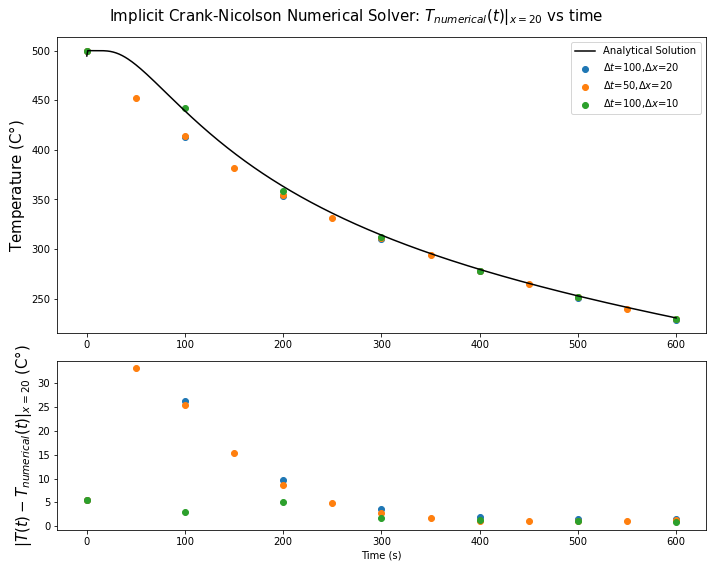

In [311]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,8),gridspec_kw={'height_ratios': [3.5, 2]})
fig.suptitle("Implicit Crank-Nicolson Numerical Solver: $T_{numerical}(t)|_{x=20}$ vs time",fontsize=15)
ax1.plot(t_analytical_plot,analytical_plot,label=("Analytical Solution"),c='k')
ax1.scatter(t_vals_1,T_x_fixed_1_imp,label=("$\Delta t$=100,$\Delta x$=20"))
ax1.scatter(t_vals_2,T_x_fixed_2_imp,label=("$\Delta t$=50,$\Delta x$=20"))
ax1.scatter(t_vals_3,T_x_fixed_3_imp,label=("$\Delta t$=100,$\Delta x$=10"))
ax1.set_ylabel("Temperature (C$\degree$)",fontsize=15)
ax1.legend()
ax2.scatter(t_vals_1,error_vals_1_imp,label=("$\Delta t$=100,$\Delta x$=20"))
ax2.scatter(t_vals_2,error_vals_2_imp,label=("$\Delta t$=50,$\Delta x$=20"))
ax2.scatter(t_vals_3,error_vals_3_imp,label=("$\Delta t$=100,$\Delta x$=10"))
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("$|T(t) - T_{numerical}(t)|_{x=20}$ (C$\degree$)",fontsize=15)
fig.tight_layout()
plt.show()

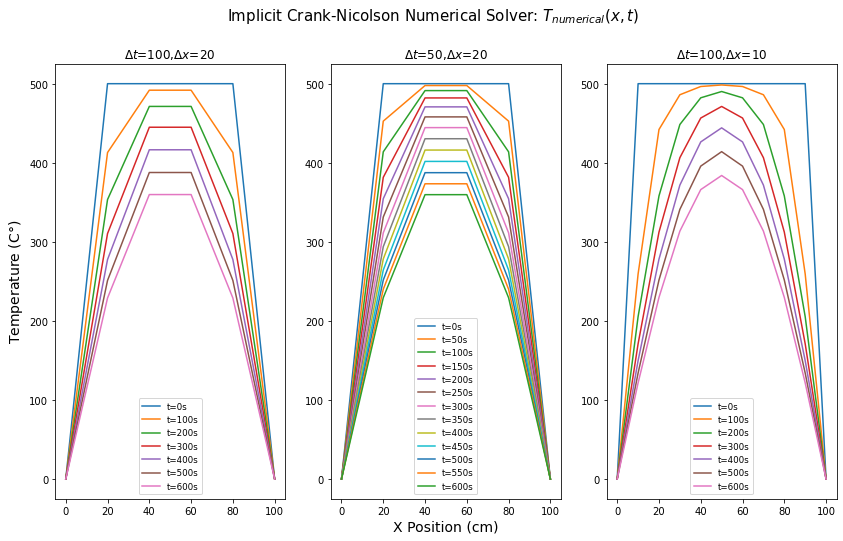

In [313]:
fig,axes = plt.subplots(1,3,figsize=(14,8))
fig.suptitle("Implicit Crank-Nicolson Numerical Solver: $T_{numerical}(x,t)$",fontsize=15)
T_grids_imp = np.array([imp_grid_1,imp_grid_2,imp_grid_3],dtype=object)
t_vals = np.array([t_vals_1,t_vals_2,t_vals_3],dtype=object)
x_vals = np.array([x_vals_1,x_vals_2,x_vals_3],dtype=object)
titles = np.array(["$\Delta t$=100,$\Delta x$=20","$\Delta t$=50,$\Delta x$=20","$\Delta t$=100,$\Delta x$=10"])
for i,ax in enumerate(axes.flat):
    if i ==0:
        ax.set_ylabel('Temperature (C$\degree$)',fontsize = 14)
    elif i ==1: 
        ax.set_xlabel('X Position (cm)',fontsize=14)
    temp_grid = T_grids_imp[i]
    for j,temps in enumerate(temp_grid):
        ax.plot(x_vals[i],temps,label="t={}s".format(t_vals[i][j]))
    ax.set_title(titles[i])
    ax.legend(loc='lower center',fontsize=8.7)
plt.show()


In [281]:
################### Part 3: Initial Temp Distribution ####################

def initial_values_f(x,g=0.1,c=400):

    initial_values = -x*g*(x-x[-1]) + c

    return initial_values

def init_grid_new(N_t,N_x,dx,Tx_0=0,Tx_L=0,g=0.1,c=400):

    grid = np.zeros((N_t,N_x))
    x_vals = np.arange(0,(N_x)*dx,dx)

    #initial values 
    grid[0,:] = initial_values_f(x_vals,g=g,c=c)
    #boundary values 
    grid[:,0] = Tx_0
    grid[:,N_x-1] = Tx_L

    return grid

def get_imp_results_early(tt,xx,dt,dx,T_x0=0,T_xL=0,g=0.1,c=400):
    
    t_vals = np.arange(0,tt+dt,dt)
    x_vals = np.arange(0,xx+dx,dx)
    N_t,N_x = get_N_t_N_x(tt,xx,dt,dx)

    temp_grid = init_grid_new(N_t,N_x,dx,T_x0,T_xL,g,c)
    imp_temp_grid = cn_implicit_solver(temp_grid,N_t,N_x,dt,dx)

    return t_vals,x_vals,imp_temp_grid

def sinusoidal(x,a=100,c=200,d=0):

    sinusoidal_val = a*(np.sin(x+d))+c

    return sinusoidal_val

def init_grid_sin_bvp(N_t,N_x,dt,a=100,c=200):

    grid = np.zeros((N_t,N_x))
    t_vals = np.arange(0,(N_t)*dt,dt)
    grid[:,0] = sinusoidal(t_vals)
    grid[:,N_x-1] = sinusoidal(t_vals)

    return grid


In [364]:
################ Implicit Solver Results: Part 3 ##########################
#System dimensions,IVPs and BVPs
tt = 60
xx = 100

#initial step sizes 1
#dt = 100
#dx = 20

#temp_grid_early = init_grid_new(N_t,N_x,dx)

dt=10
dx = 10
ii = int(20/dx)
t_vals_1,x_vals_1,imp_grid_early_1 = get_imp_results_early(tt,xx,dt,dx)
T_x_fixed_1_imp_early = imp_grid_early_1[:,ii]

############################ step sizes 2 #####################
#dt = 50
#dx = 20
dt=1
dx =1 
ii = int(20/dx)

t_vals_2,x_vals_2,imp_grid_early_2 = get_imp_results_early(tt,xx,dt,dx)
T_x_fixed_2_imp_early = imp_grid_early_2[:,ii]

########################## step sizes 3 ######################
dt= 0.1
dx = 0.1
ii = int(20/dx)

t_vals_3,x_vals_3,imp_grid_early_3 = get_imp_results_early(tt,xx,dt,dx)
T_x_fixed_3_imp_early = imp_grid_early_3[:,ii]


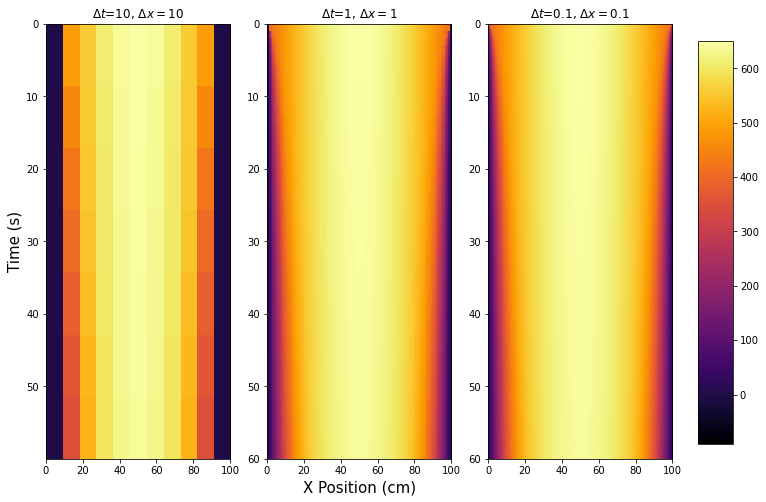

In [368]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,8))

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(imp_grid_early_1), np.min(imp_grid_early_2),np.min(imp_grid_early_3)])
maxmax = np.max([np.max(imp_grid_early_1), np.max(imp_grid_early_2),np.max(imp_grid_early_3)])

im1 = axes[0].imshow(imp_grid_early_1, vmin=minmin, vmax=maxmax,
                     extent=(0,100,60,0), aspect='auto', cmap='inferno'
                     ,interpolation='none')
axes[0].set_title('$\Delta t$=10, $\Delta x=10$',fontsize=12)
axes[0].set_ylabel('Time (s)',fontsize=15)
axes[0].set_yticks(np.arange(0,tt,10))
im2 = axes[1].imshow(imp_grid_early_2, vmin=minmin, vmax=maxmax,
                     extent=(0,100,60,0), aspect='auto', cmap='inferno',interpolation='none')
axes[1].set_title('$\Delta t$=1, $\Delta x=1$',fontsize=12)
axes[1].set_xlabel('X Position (cm)',fontsize=15)
im3 = axes[2].imshow(imp_grid_early_3, vmin=minmin, vmax=maxmax,
                     extent=(0,100,60,0), aspect='auto', cmap='inferno',interpolation='none')
axes[2].set_title('$\Delta t$=0.1, $\Delta x=0.1$',fontsize=12)

# add space for colour bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(im2, cax=cbar_ax)
#plt.suptitle('Crank-Nicolson Solver, 2D time-position plot of Heat',y=0.93,fontsize=17)

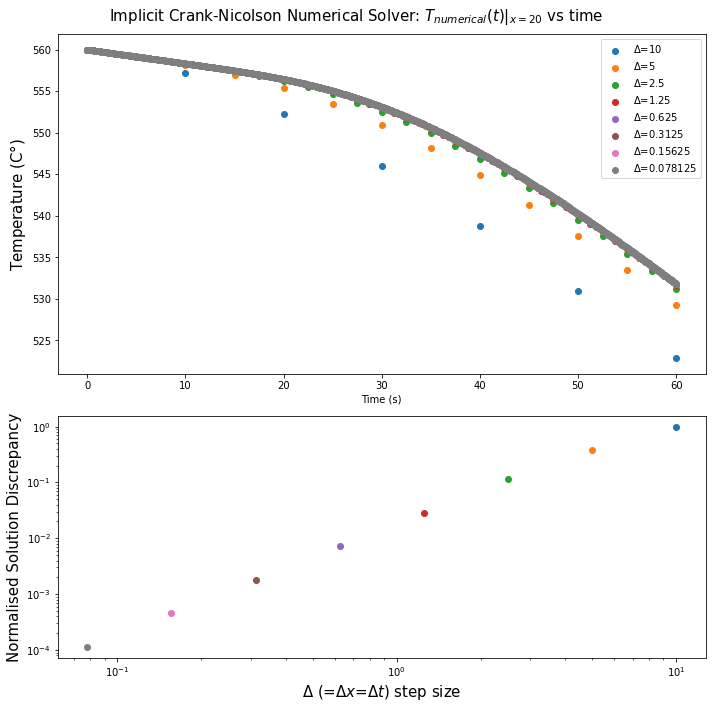

array([1.00000000e+00, 3.83557316e-01, 1.12753102e-01, 2.89162334e-02,
       7.25198580e-03, 1.81404779e-03, 4.53571795e-04, 1.13396593e-04])

In [370]:
#temp_grid_early = init_grid_new(N_t,N_x,dx)
def imp_converge_results(dx_steps,dt_steps,tt,xx):
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10),gridspec_kw={'height_ratios': [3.5, 2.5]})
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    fig.suptitle("Implicit Crank-Nicolson Numerical Solver: $T_{numerical}(t)|_{x=20}$ vs time",fontsize=15)
    imp_differences_norm = np.array([])
    imp_final_values = np.array([])
    for i,dx in enumerate(dx_steps):
        
        ii = int(20/dx)
        t_vals,x_vals,imp_grid_early = get_imp_results_early(tt,xx,dt_steps[i],dx)
        T_x_fixed_imp_early = imp_grid_early[:,ii]
        T_x_imp_last = T_x_fixed_imp_early[-1]
        
        if i > 0:
            imp_difference = abs(T_x_imp_last - imp_final_values[-1])
            
            if i == 1: 
                imp_difference_0 = imp_difference
                
            imp_difference_norm = imp_difference/imp_difference_0
            imp_differences_norm = np.append(imp_differences_norm,imp_difference_norm)
            
            ax2.scatter(dx,imp_difference_norm)
            ax1.scatter(t_vals,T_x_fixed_imp_early,label=("$\Delta$={}".format(dx)))
            
        imp_final_values = np.append(imp_final_values,T_x_imp_last)
       
    
    ax1.set_ylabel("Temperature (C$\degree$)",fontsize=15)
    ax1.set_xlabel("Time (s)")
    ax1.legend()
    
    ax2.set_ylabel("Normalised Solution Discrepancy",fontsize=15)
    ax2.set_xlabel("$\Delta$ (=$\Delta x$=$ \Delta t$) step size",fontsize=15)

    fig.tight_layout()
    plt.show()
    
    return imp_differences_norm 

dx_steps = [20,10,5,2.5,1.25,0.625,0.3125,0.15625,0.078125]

imp_converge_results(dx_steps,dx_steps,60,100)

10


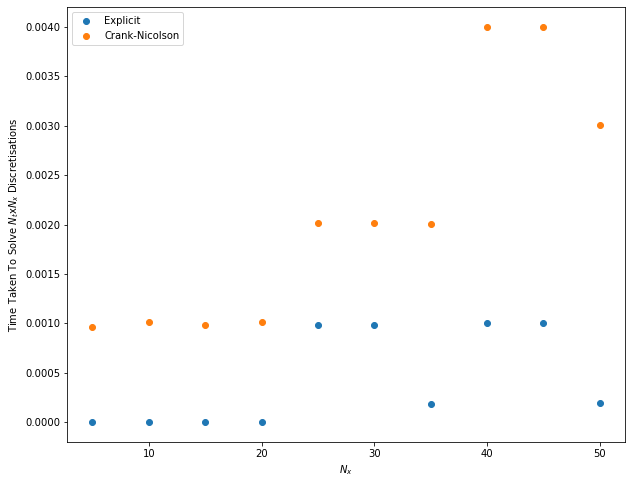

In [359]:
def time_exp_imp(reps,tt,xx,dt,dx,T_x0,T_xL,T_t0):
    time_exps = np.zeros(reps)
    time_imps = np.zeros(reps)
    for i in np.arange(reps):
        exp_start = time.time()
        get_exp_results(tt,xx,dt,dx,T_x0,T_xL,T_t0)
        exp_end = time.time()
        time_exps[i] = (exp_end - exp_start)
        
        imp_start = time.time()
        get_imp_results(tt,xx,dt,dx,T_x0,T_xL,T_t0)
        imp_end = time.time()
        time_imps[i] = (imp_end - imp_start)
        
    return time_exps,time_imps

def time_exp_imp_xx(tt,xx_arr,dt,dx,T_x0,T_xL,T_t0):
    exp_xx_times = np.zeros(len(xx_arr))
    imp_xx_times = np.zeros(len(xx_arr))
    
    fig,ax = plt.subplots(figsize=(10,8))
    ax.set_ylabel('Time Taken To Solve $N_t$x$N_x$ Discretisations')
    ax.set_xlabel('$N_x$')
    for i,xx in enumerate(xx_arr):
        exp_start = time.time()
        get_exp_results(tt,xx,dt,dx,T_x0,T_xL,T_t0)
        exp_end = time.time()
        exp_xx_times[i] = exp_end - exp_start
        
        imp_start = time.time()
        get_imp_results(tt,xx,dt,dx,T_x0,T_xL,T_t0)
        imp_end = time.time()
        imp_xx_times[i] = imp_end - imp_start
        
        xx_arr[i] = xx/dx
      
    print(len(imp_xx_times))
    ax.scatter(xx_arr,exp_xx_times,label='Explicit')
    ax.scatter(xx_arr,imp_xx_times,label='Crank-Nicolson')
        
    plt.legend()
        
    plt.show()

time_exp_imp_xx(1000,[100,200,300,400,500,600,700,800,900,1000],100,20,0,0,500)

In [347]:
time_exps,time_imps = time_exp_imp(100,10000,1000,50,20,0,0,500)
time_imp_mean = np.mean(time_imps)
time_imp_std = np.std(time_imps)
time_exp_mean = np.mean(time_exps)
time_exp_std = np.std(time_exps)

print(time_imp_mean,time_imp_std)
print(time_exp_mean,time_exp_std)


0.07613771200180054 0.013205881025961826
0.027796709537506105 0.006958796904526258


In [25]:
def main():

    tt = 600
    xx = 100
    dt = 100
    dx = 5
    T_x0 = 0
    T_xL = 0
    T_t0 = 500

    t_vals = np.arange(0,tt+dt,dt)
    x_vals = np.arange(0,xx+dx,dx)
    N_t,N_x = get_N_t_N_x(tt,xx,dt,dx)

    temp_grid = initialise_grid(N_t,N_x,T_t0,T_x0,T_xL)

    temp_grid,ana_T_vals,abs_error = get_Tgrid_ana_T_error(temp_grid,N_t,N_x,dt,dx,1)
    plot_TxTL_exp(temp_grid,t_vals,x_vals)
    plot_Tt_exp(ana_T_vals,temp_grid,1,t_vals,x_vals)

    CN = init_cn_matrix(N_x,dt,dx)

    temp_grid_early = init_grid_new(N_t,N_x,dx)
    #temp_grid_sin = init_grid_sin_bvp(N_t,N_x,dt)
    #print(x_vals)
    #print(initial_values_f(x_vals))

    temp_grid = initialise_grid(N_t,N_x,T_t0,T_x0,T_xL)
    T_grid = cn_implicit_solver(temp_grid,N_t,N_x,dt,dx)
    plot_TxTL_exp(T_grid,t_vals,x_vals)

main()

#test_matrix = np.reshape(np.array(([2,-1,0,0],[-1,2,-1,0],[0,-1,2,-1],[0,0,-1,2])),(4,4))
    #print(test_matrix)
    #test_vector = np.array([4,2,2,10])
    #print(Thomas_algorithm(test_matrix,test_vector))

NameError: name 'get_Tgrid_ana_T_error' is not defined